#Visualization of Covid-19 progress and statistics



In [1]:
import numpy as np 
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from operator import itemgetter, attrgetter
import os
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')
folderpath = '/content/gdrive/My Drive/Colab Notebooks/covidproject'
os.chdir(folderpath)

Mounted at /content/gdrive


We import our helper functions custom python module.

In [3]:
import VisFunctions as vf

We read the necessary population and global covid data files to process.

In [4]:
data = pd.read_csv('WHO-COVID-19-global-data2.csv')
population =  pd.read_excel('WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx', index_col=None, header=None)
population = np.array(population)
#sys.path.append('/content/gdrive/My Drive')


We initialy extract the names of the countries we are considering for this project and search for their population

In [5]:
countries=data['Country'].unique()
Dates_reported=sorted(list(data['Date_reported'].unique()))
Population = vf.World_Population(population,countries)


For conviniency we have created a Class country. We make country objects and store for each one in their respective attributes the country name , the new cases each day, the new deaths each day , the cumulative cases over time , the cumulative deaths over time, the countries total cases and deaths up to today, the countries population and finaly cases and deaths per million. We store all these countries object in a list for further use of their statistics. Note tha we had to perform a padding operation in order for all cases and deaths to start at the same date for every country.

In [6]:
countries_covid=[]
L=len(Dates_reported)
for i,c in enumerate(countries):
  country_object=vf.country(c)
  country_object.set_new_cases(data)
  country_object.set_new_deaths(data)
  country_object.set_cumulative_cases(data)
  country_object.set_cumulative_deaths(data)
  country_object.padding(L)
  country_object.set_total_cases()
  country_object.set_total_deaths()
  country_object.set_total_mr()
  country_object.set_daily_mr()
  country_object.set_cumulative_mr()
  country_object.set_population(Population)
  country_object.set_cases_per_million()
  country_object.set_deaths_per_million()
  countries_covid.append(country_object)


We calculate the data statistics on a world-wide scale. 

In [7]:
Wnew_cases,Wnew_deaths,Wcumulative_cases,Wcumulative_deaths,Wtotal_cases,Wtotal_deaths,Wcases_per_million,Wdeaths_per_million,mr,Wdaily_mr,Wcumulative_mr=vf.world_data(countries_covid)


In [8]:
print("The World's Mortality Rate for COVID-19 is: {}%".format(mr*100))
print("There are {} cases per 1 million and {} deaths per 1 million people all around the world".format(int(Wcases_per_million*100),int(Wdeaths_per_million*100)))

The World's Mortality Rate for COVID-19 is: 1.9338195874351018%
There are 1405 cases per 1 million and 20 deaths per 1 million people all around the world


We plot some worldwide statistics.

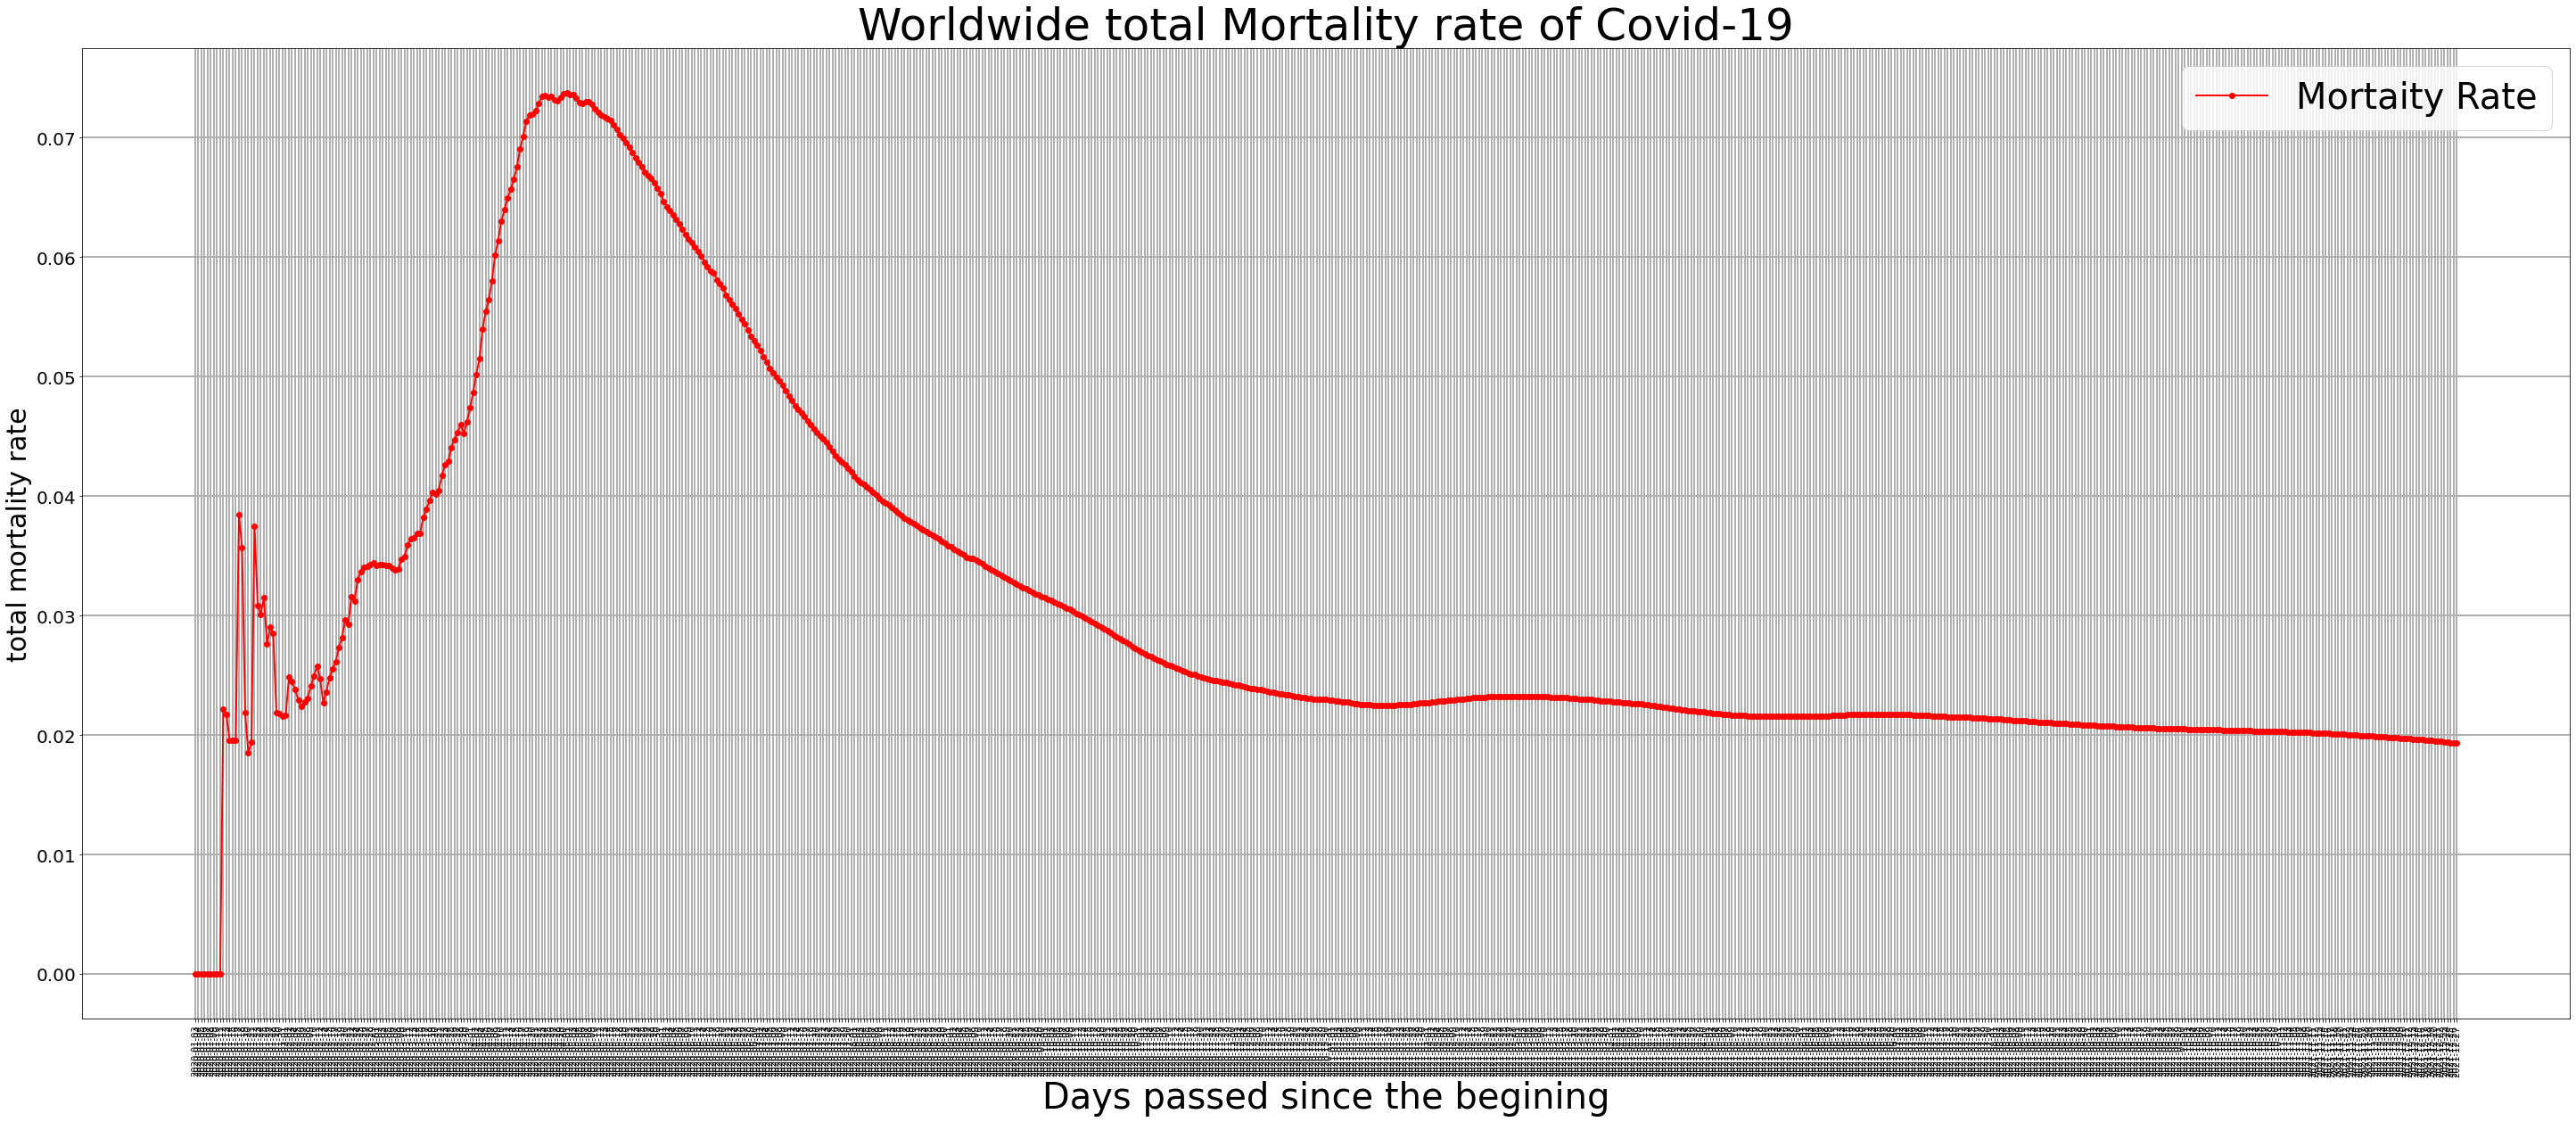

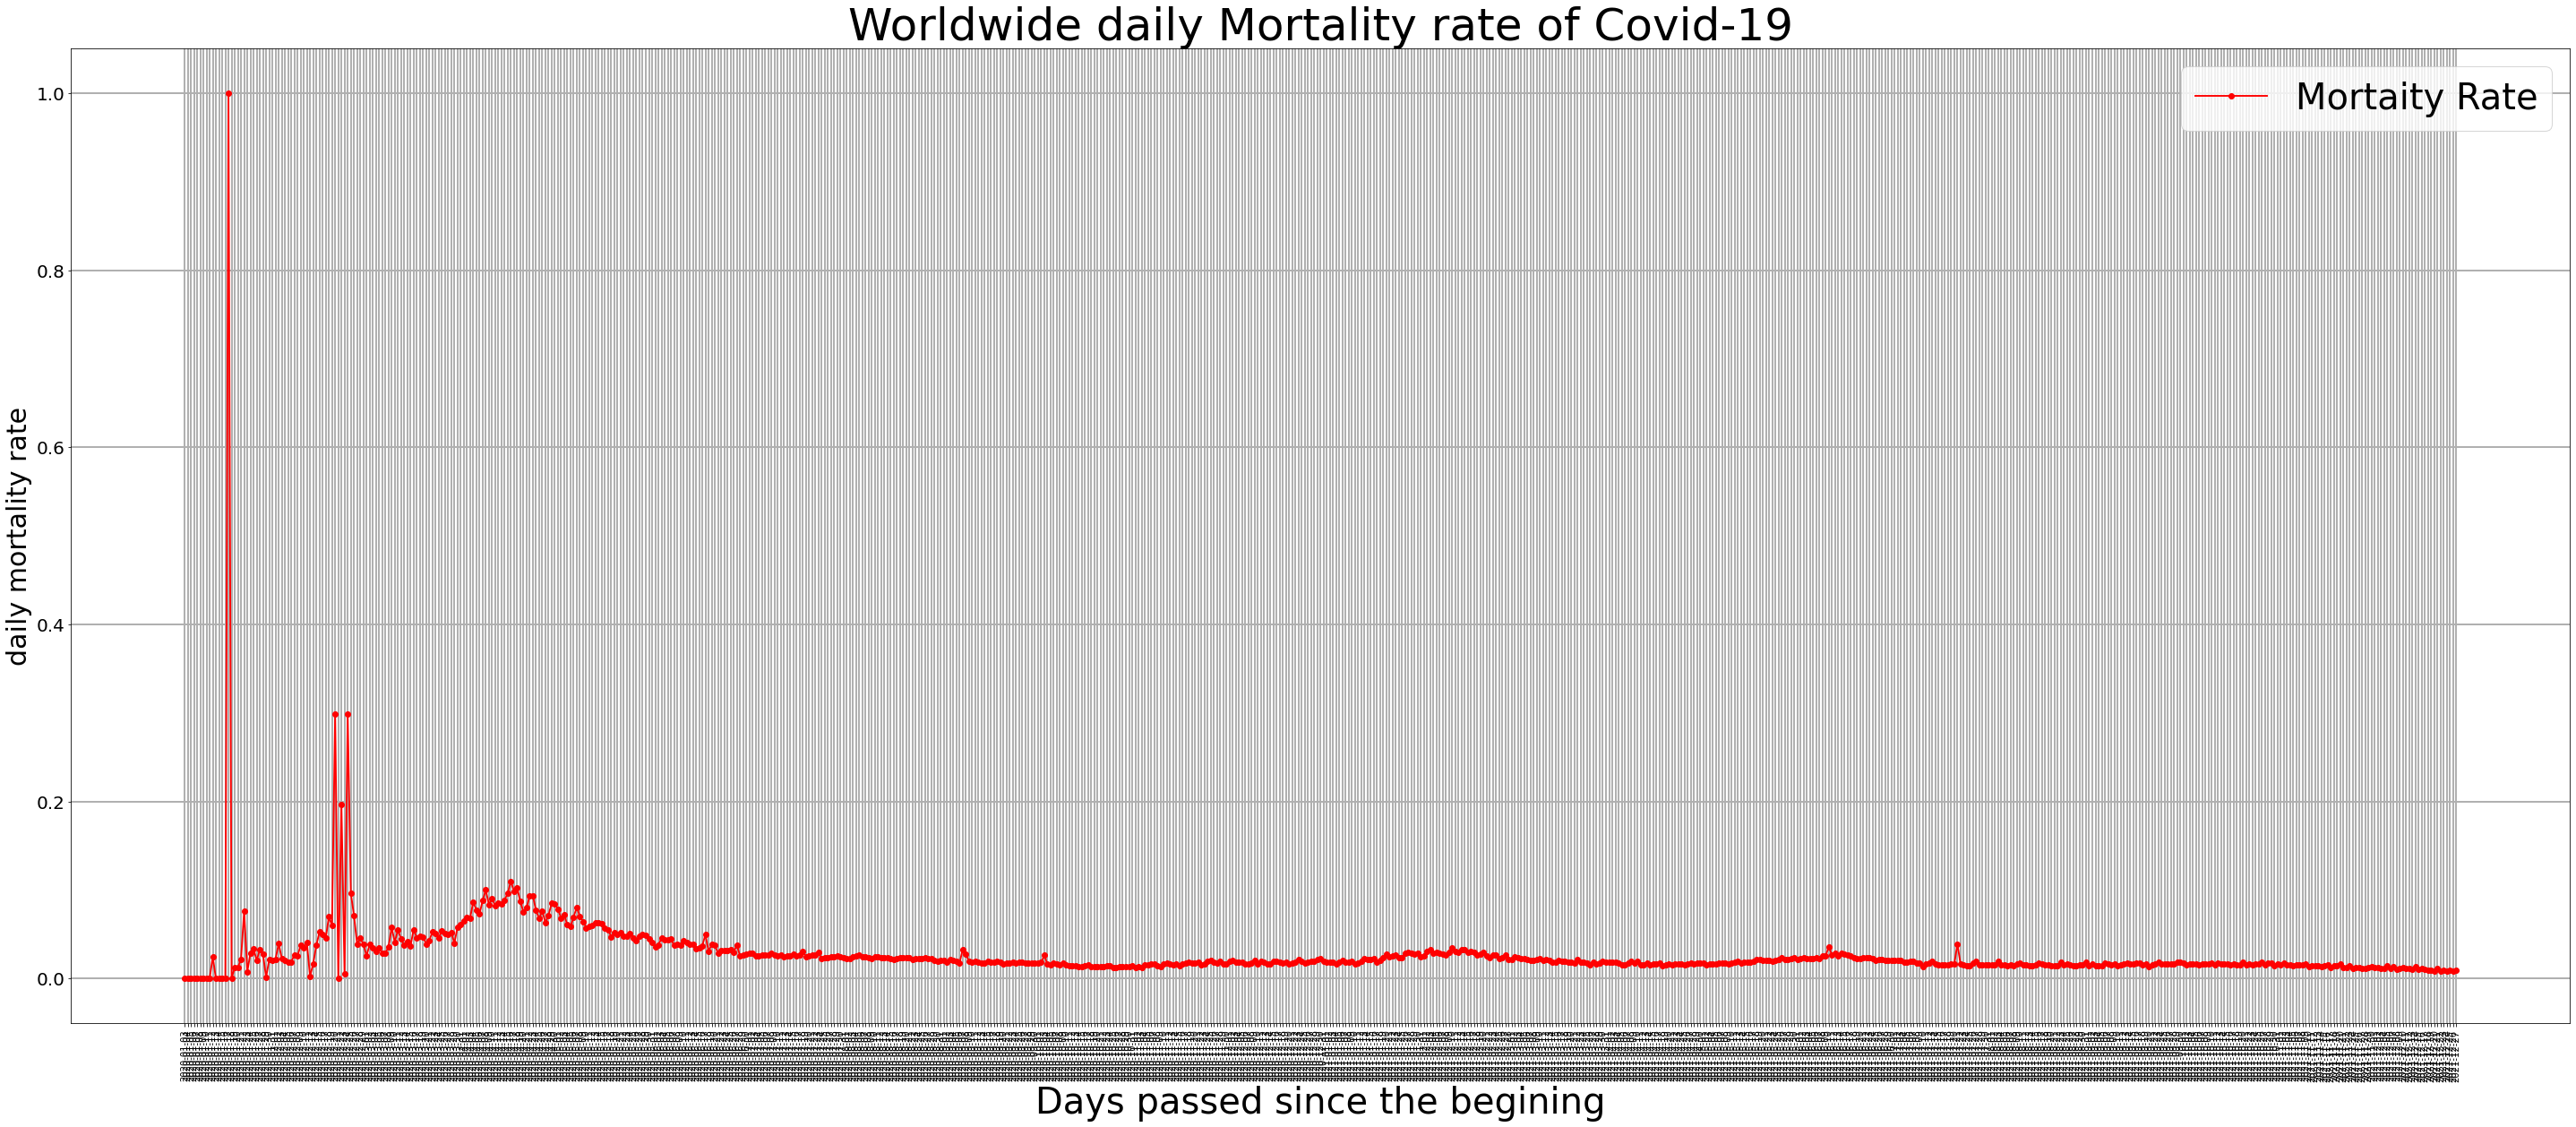

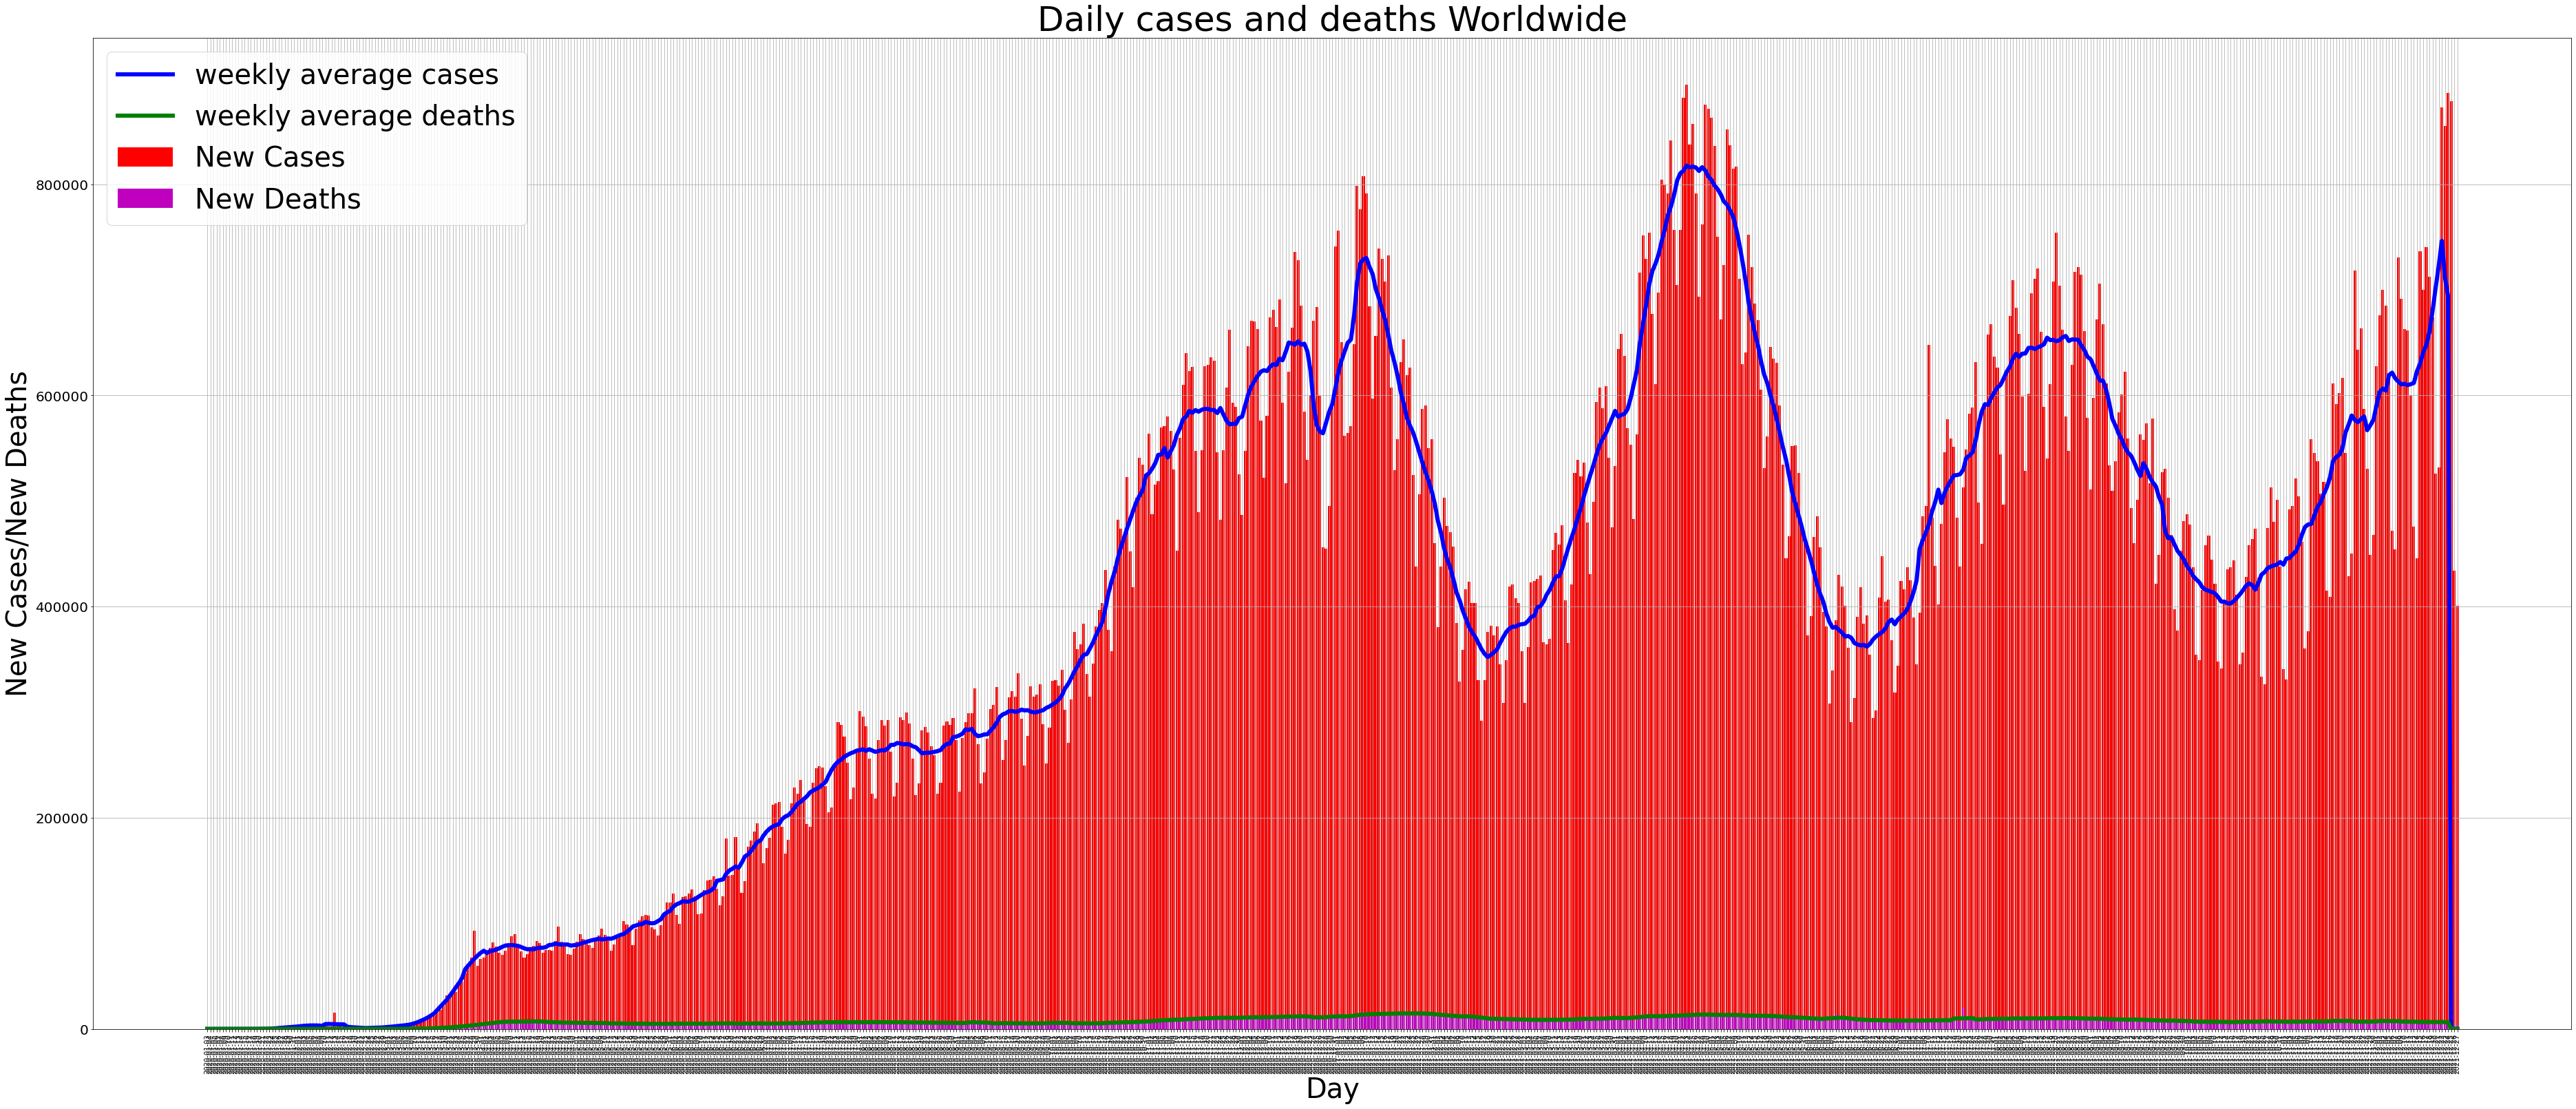

In [9]:
vf.plot_WorldMR(Wcumulative_mr,Dates_reported,"total")
vf.plot_WorldMR(Wdaily_mr,Dates_reported,"daily")
weekly_deaths=vf.moving_av(Wnew_deaths,7)
weekly_cases=vf.moving_av(Wnew_cases,7)
vf.plot_daily(Wnew_cases,Wnew_deaths,weekly_cases,weekly_deaths,Dates_reported,'Worldwide')

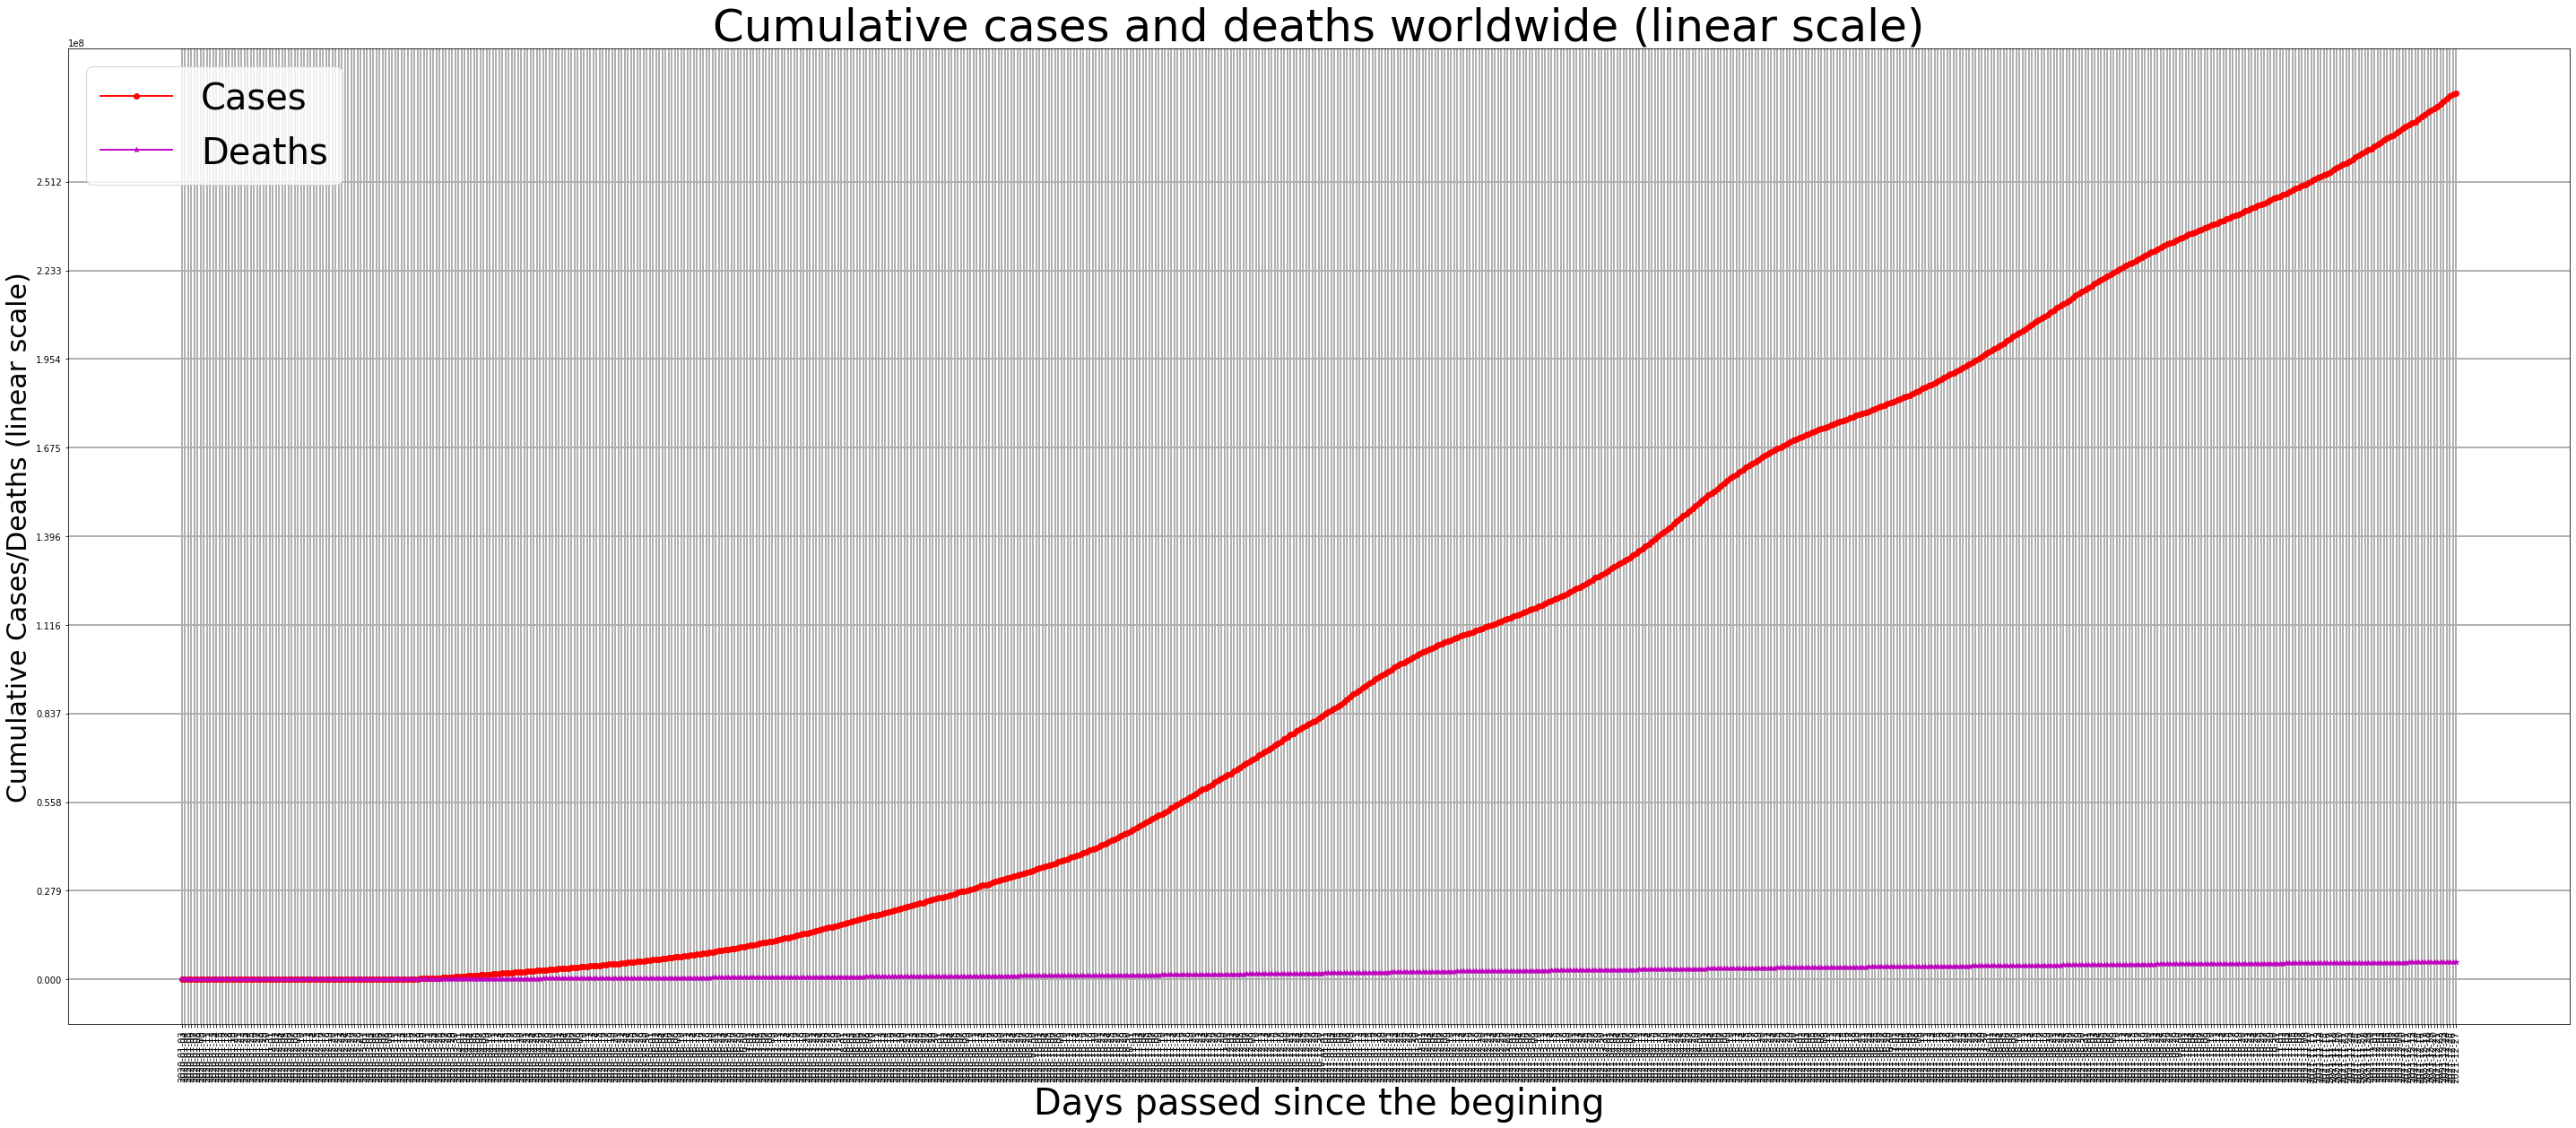

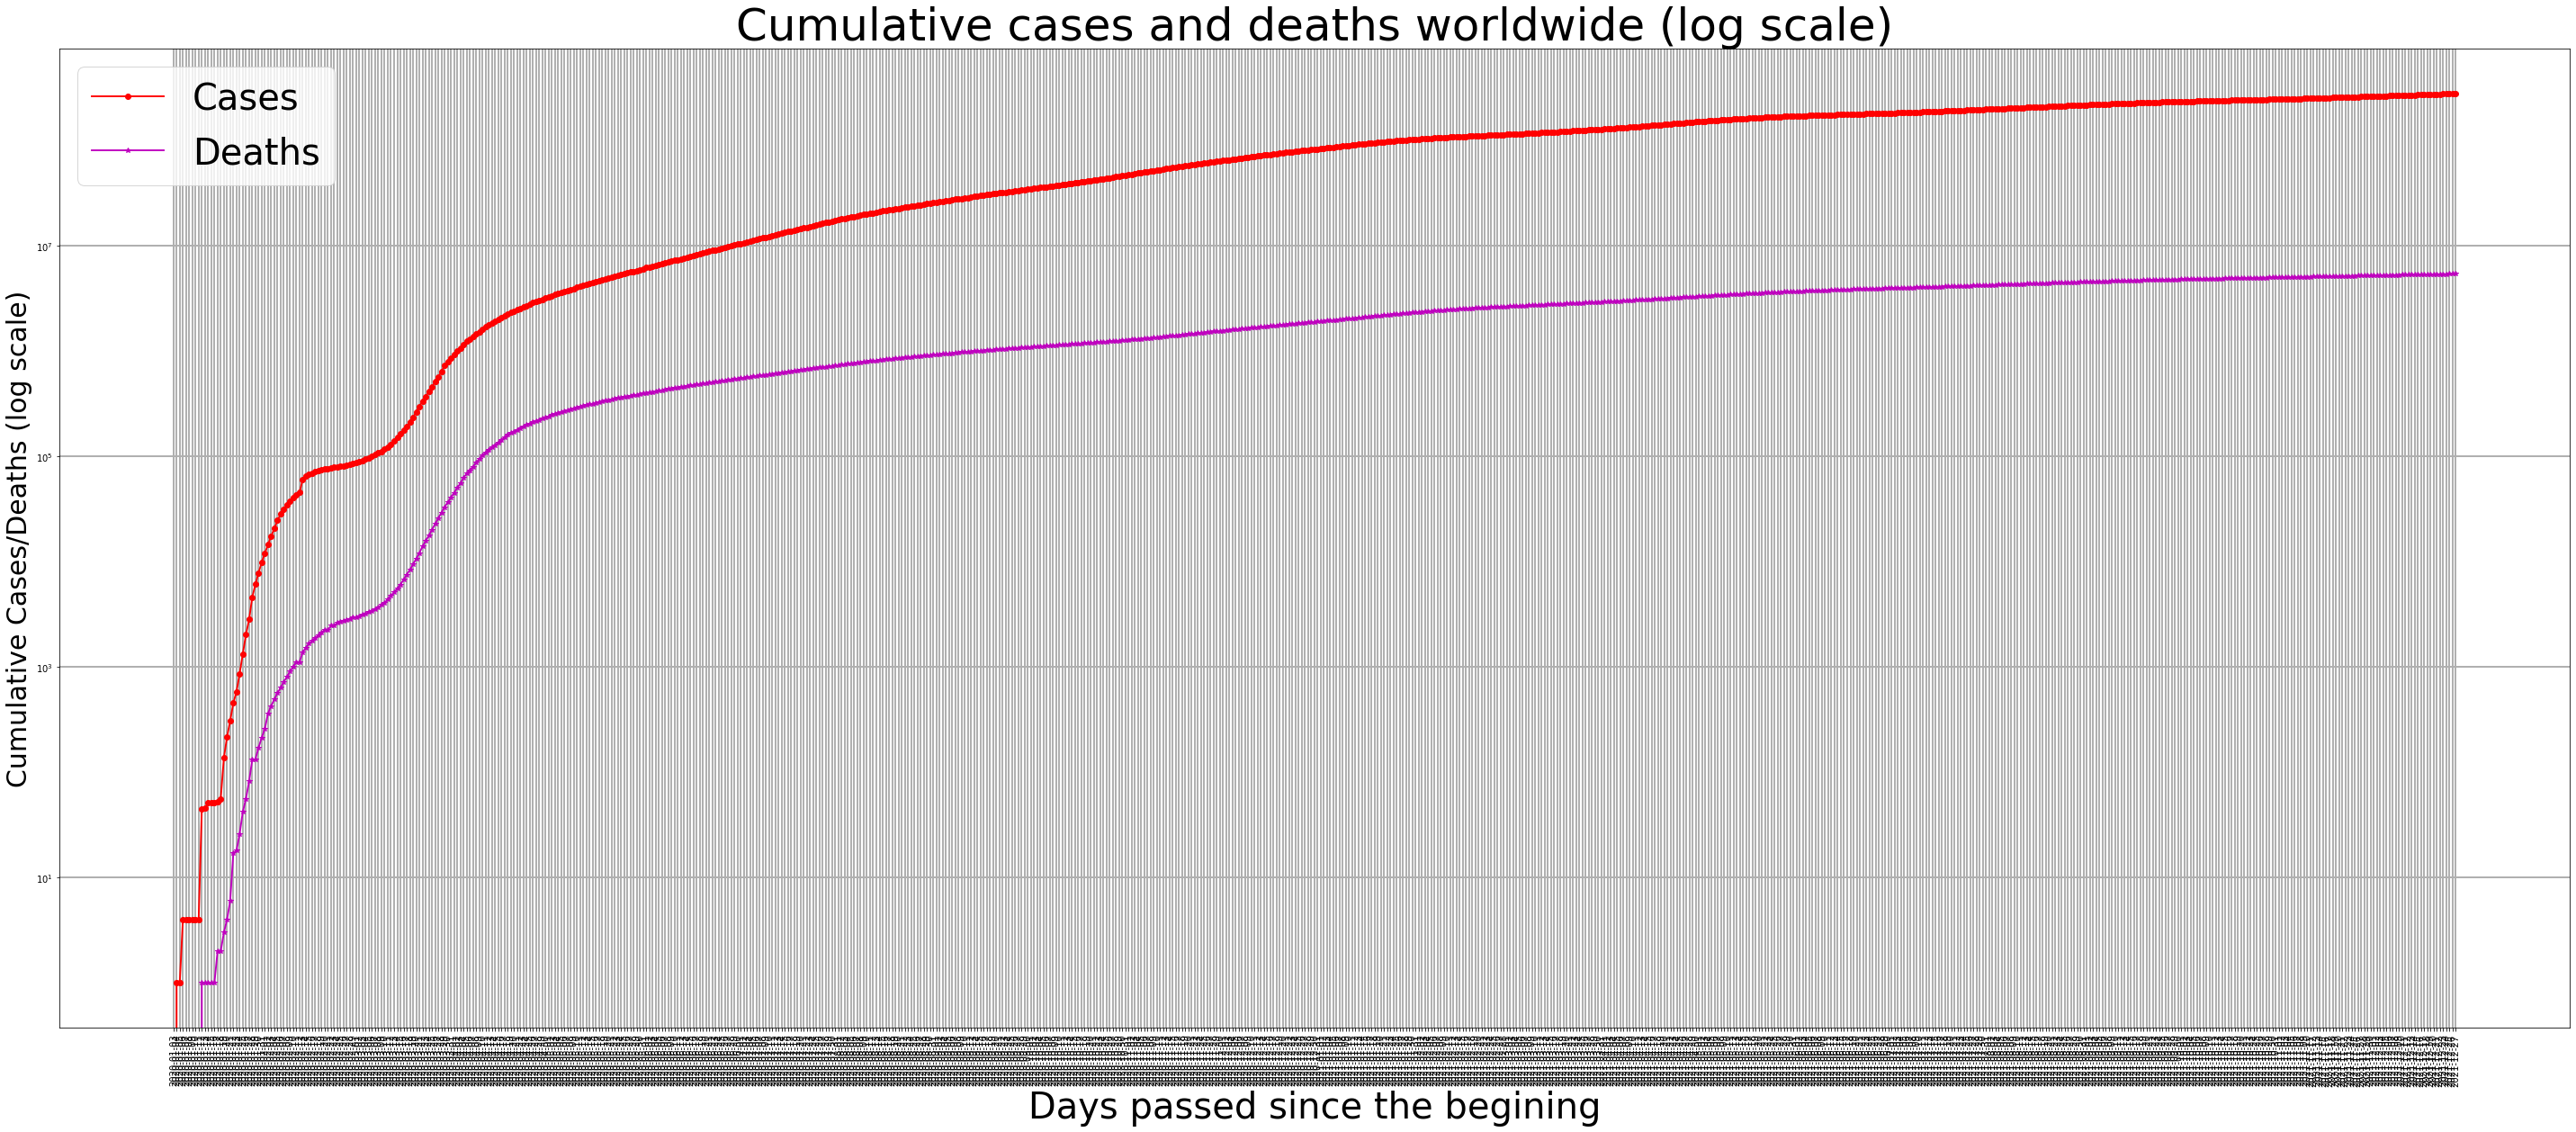

In [10]:
vf.plot_cumulative(Wcumulative_cases,Wcumulative_deaths,'worldwide',Dates_reported,'linear')
vf.plot_cumulative(Wcumulative_cases,Wcumulative_deaths,'worldwide',Dates_reported,'log')

We visualize the latest total statistics for each country

We create bar plots for the top 10 countries each time with respect to total cases, total deaths , mortality rate , cases per million and deaths per million.

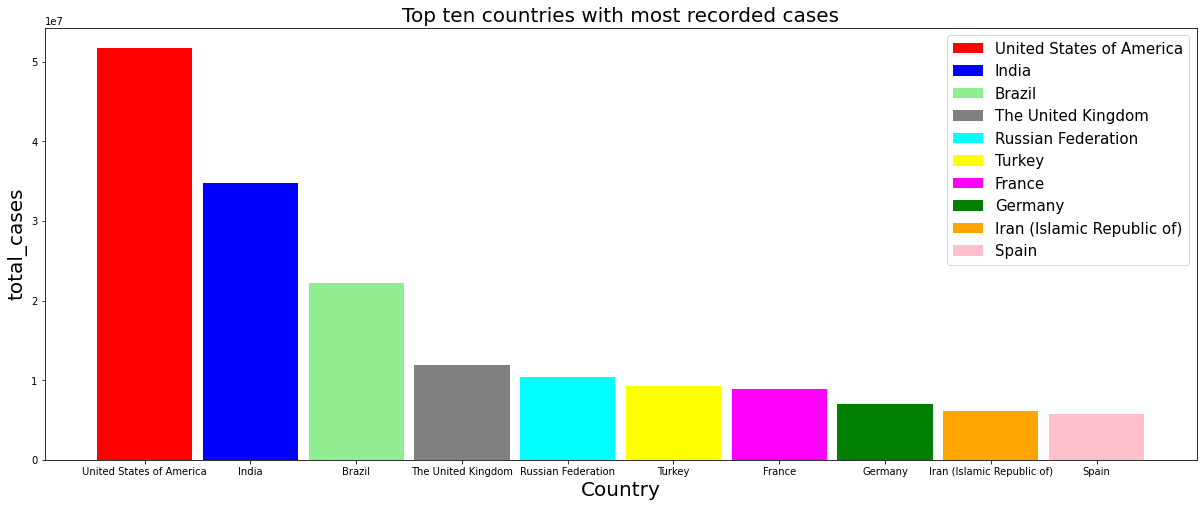

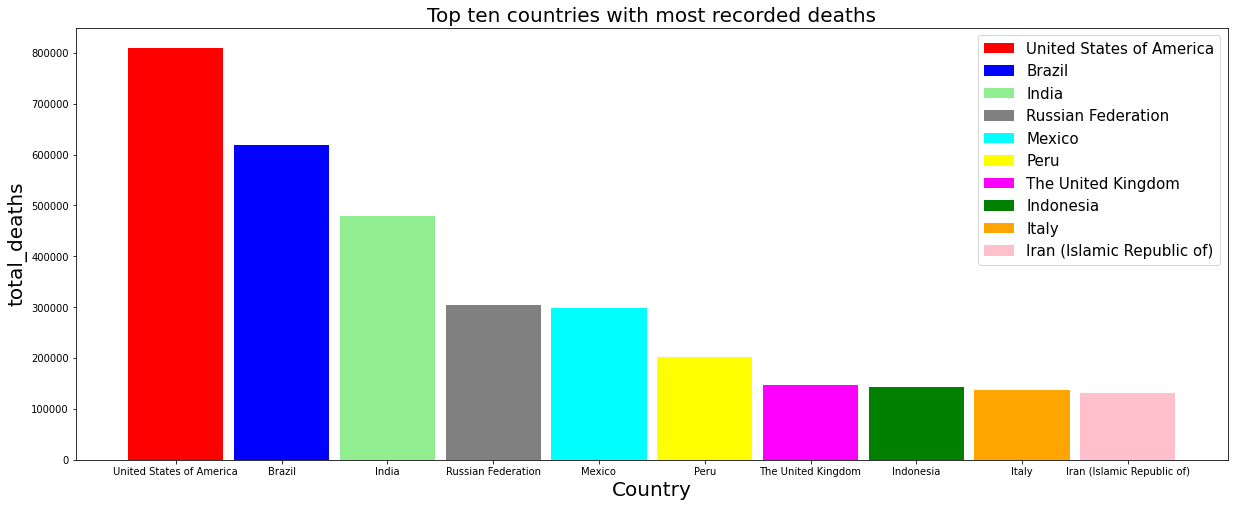

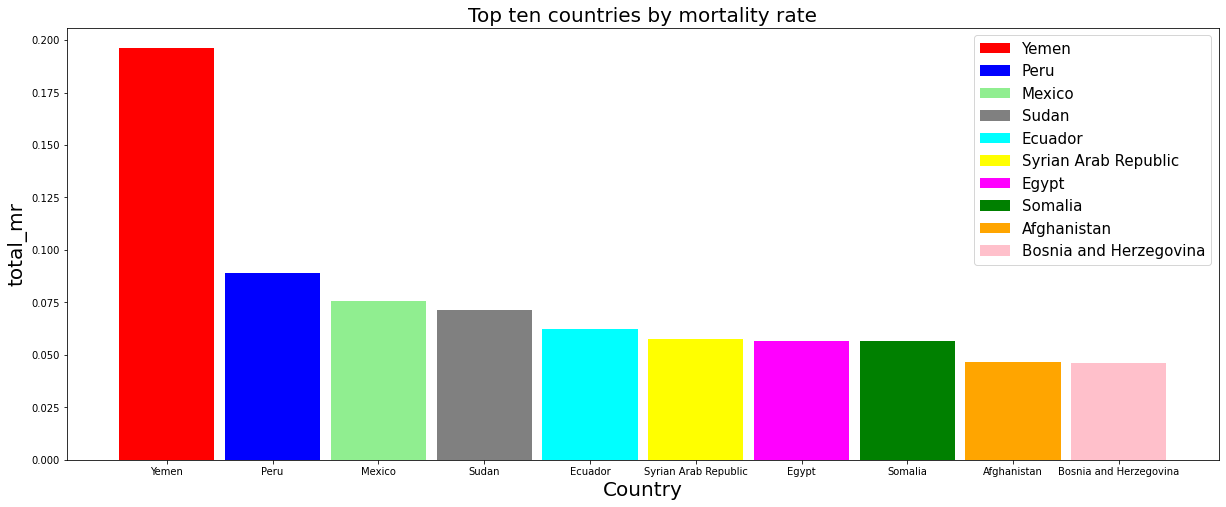

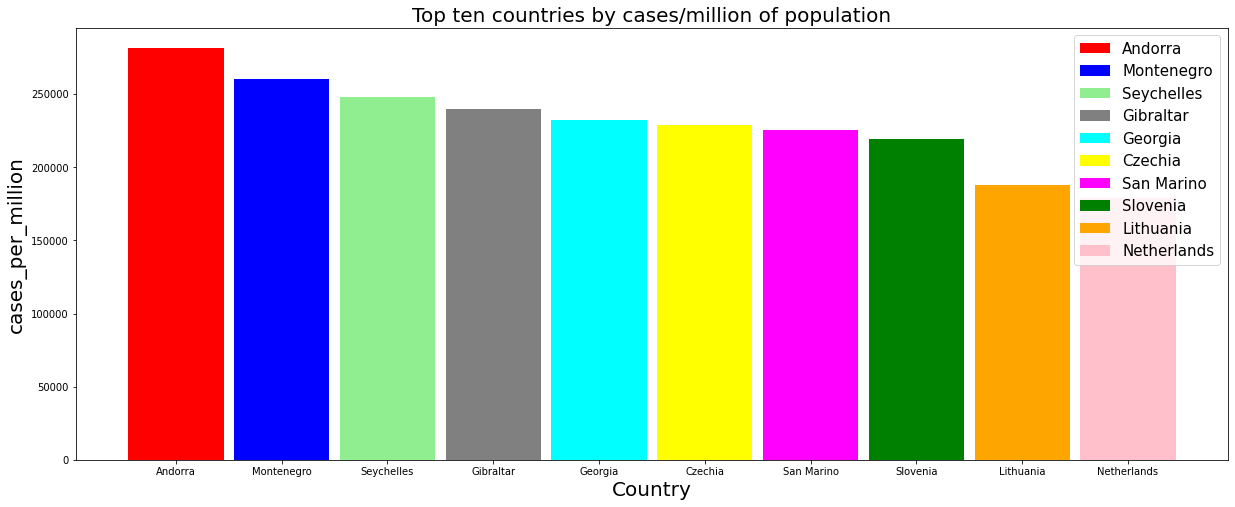

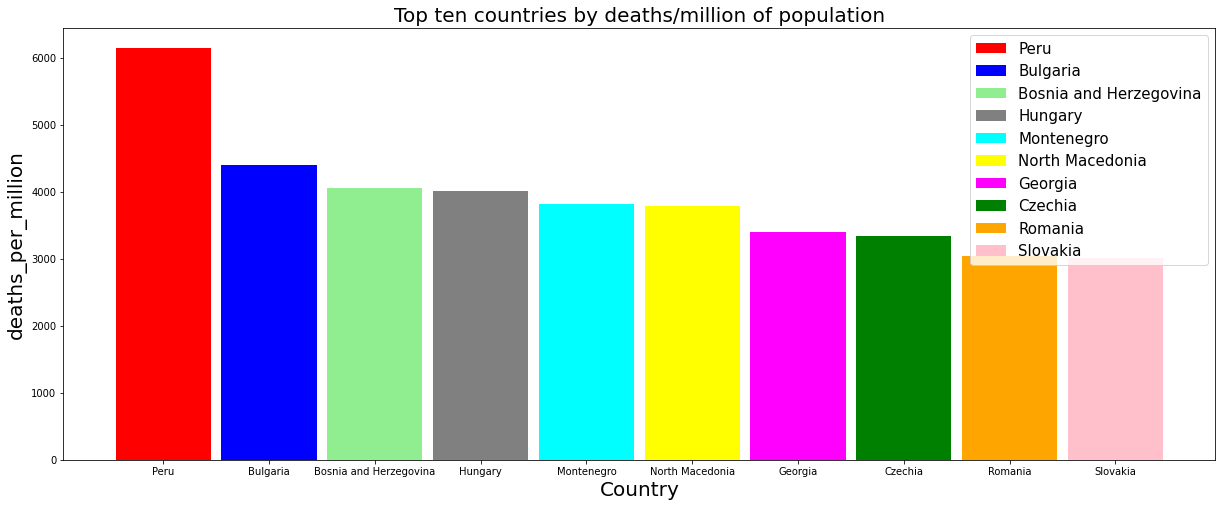

In [11]:
vf.plot_top10(countries_covid,'with most recorded cases','total_cases',15)
vf.plot_top10(countries_covid,'with most recorded deaths','total_deaths',15)
vf.plot_top10(countries_covid,'by mortality rate','total_mr',15)
vf.plot_top10(countries_covid,'by cases/million of population','cases_per_million',15)
vf.plot_top10(countries_covid,'by deaths/million of population','deaths_per_million',15)

We visualize the confirmed cases and confirmed deaths per country with pie charts.

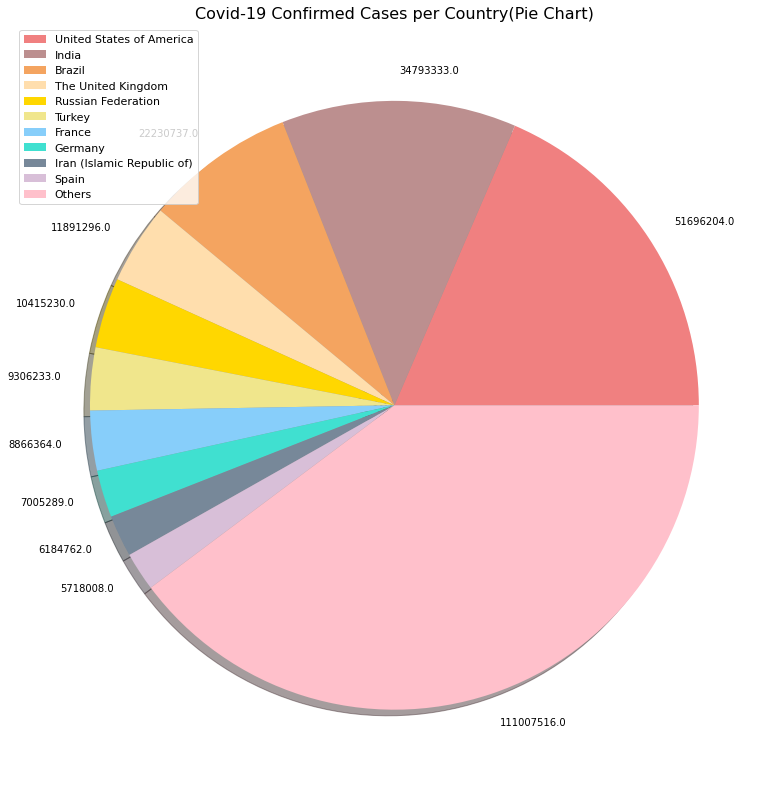

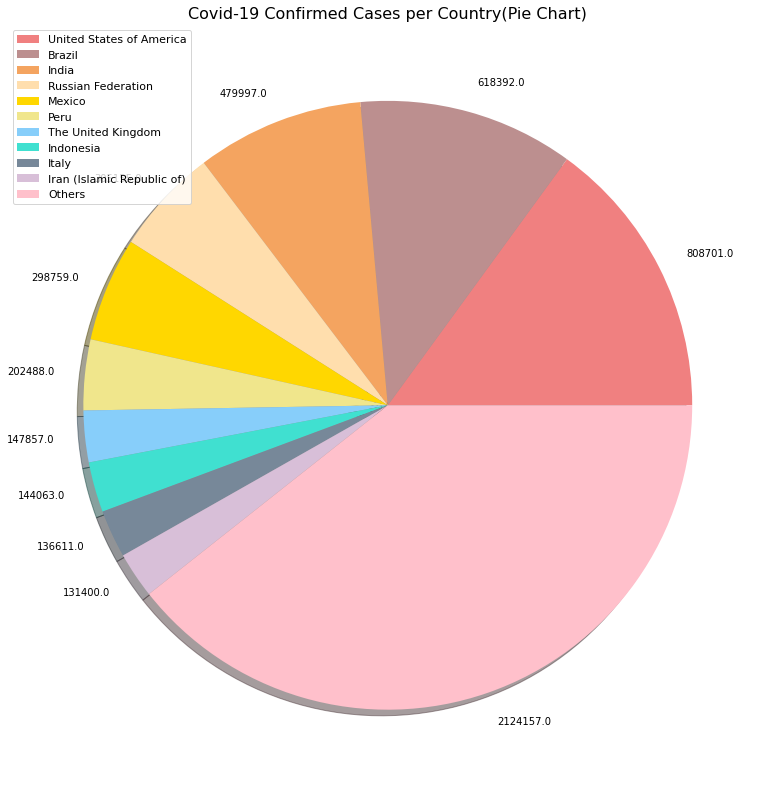

In [12]:
vf.plot_pie_charts(countries_covid,'total_cases','Covid-19 Confirmed Cases per Country(Pie Chart)')
vf.plot_pie_charts(countries_covid,'total_deaths','Covid-19 Confirmed Cases per Country(Pie Chart)')

In [13]:
temp_list = sorted(countries_covid,key=attrgetter('total_cases'),reverse=True)
country_df = pd.DataFrame({'Country Name':[c.country_name for c in temp_list], 'Number of Confirmed Cases': [c.total_cases for c in temp_list],
                          'Number of Deaths': [c.total_deaths for c in temp_list],
                          'Mortality Rate': [c.total_mr for c in temp_list],
                          'Cases per million': [c.cases_per_million for c in temp_list],
                          'Deaths per million': [c.deaths_per_million for c in temp_list]})
country_df.style.background_gradient(cmap='Oranges')

,Country Name,Number of Confirmed Cases,Number of Deaths,Mortality Rate,Cases per million,Deaths per million
0,United States of America,51696204.000000,808701.000000,0.015643,156180.636223,2443.185900
1,India,34793333.000000,479997.000000,0.013796,25212.480031,347.822808
2,Brazil,22230737.000000,618392.000000,0.027817,104585.993650,2909.266651
3,The United Kingdom,11891296.000000,147857.000000,0.012434,0.000000,0.000000
4,Russian Federation,10415230.000000,305155.000000,0.029299,71369.229721,2091.041417
5,Turkey,9306233.000000,81576.000000,0.008766,110343.086911,967.238587
6,France,8866364.000000,120066.000000,0.013542,135834.027132,1839.429139
7,Germany,7005289.000000,110433.000000,0.015764,83611.352987,1318.068754
8,Iran (Islamic Republic of),6184762.000000,131400.000000,0.021246,73634.296439,1564.416958
9,Spain,5718008.000000,89019.000000,0.015568,122297.819241,1903.954939


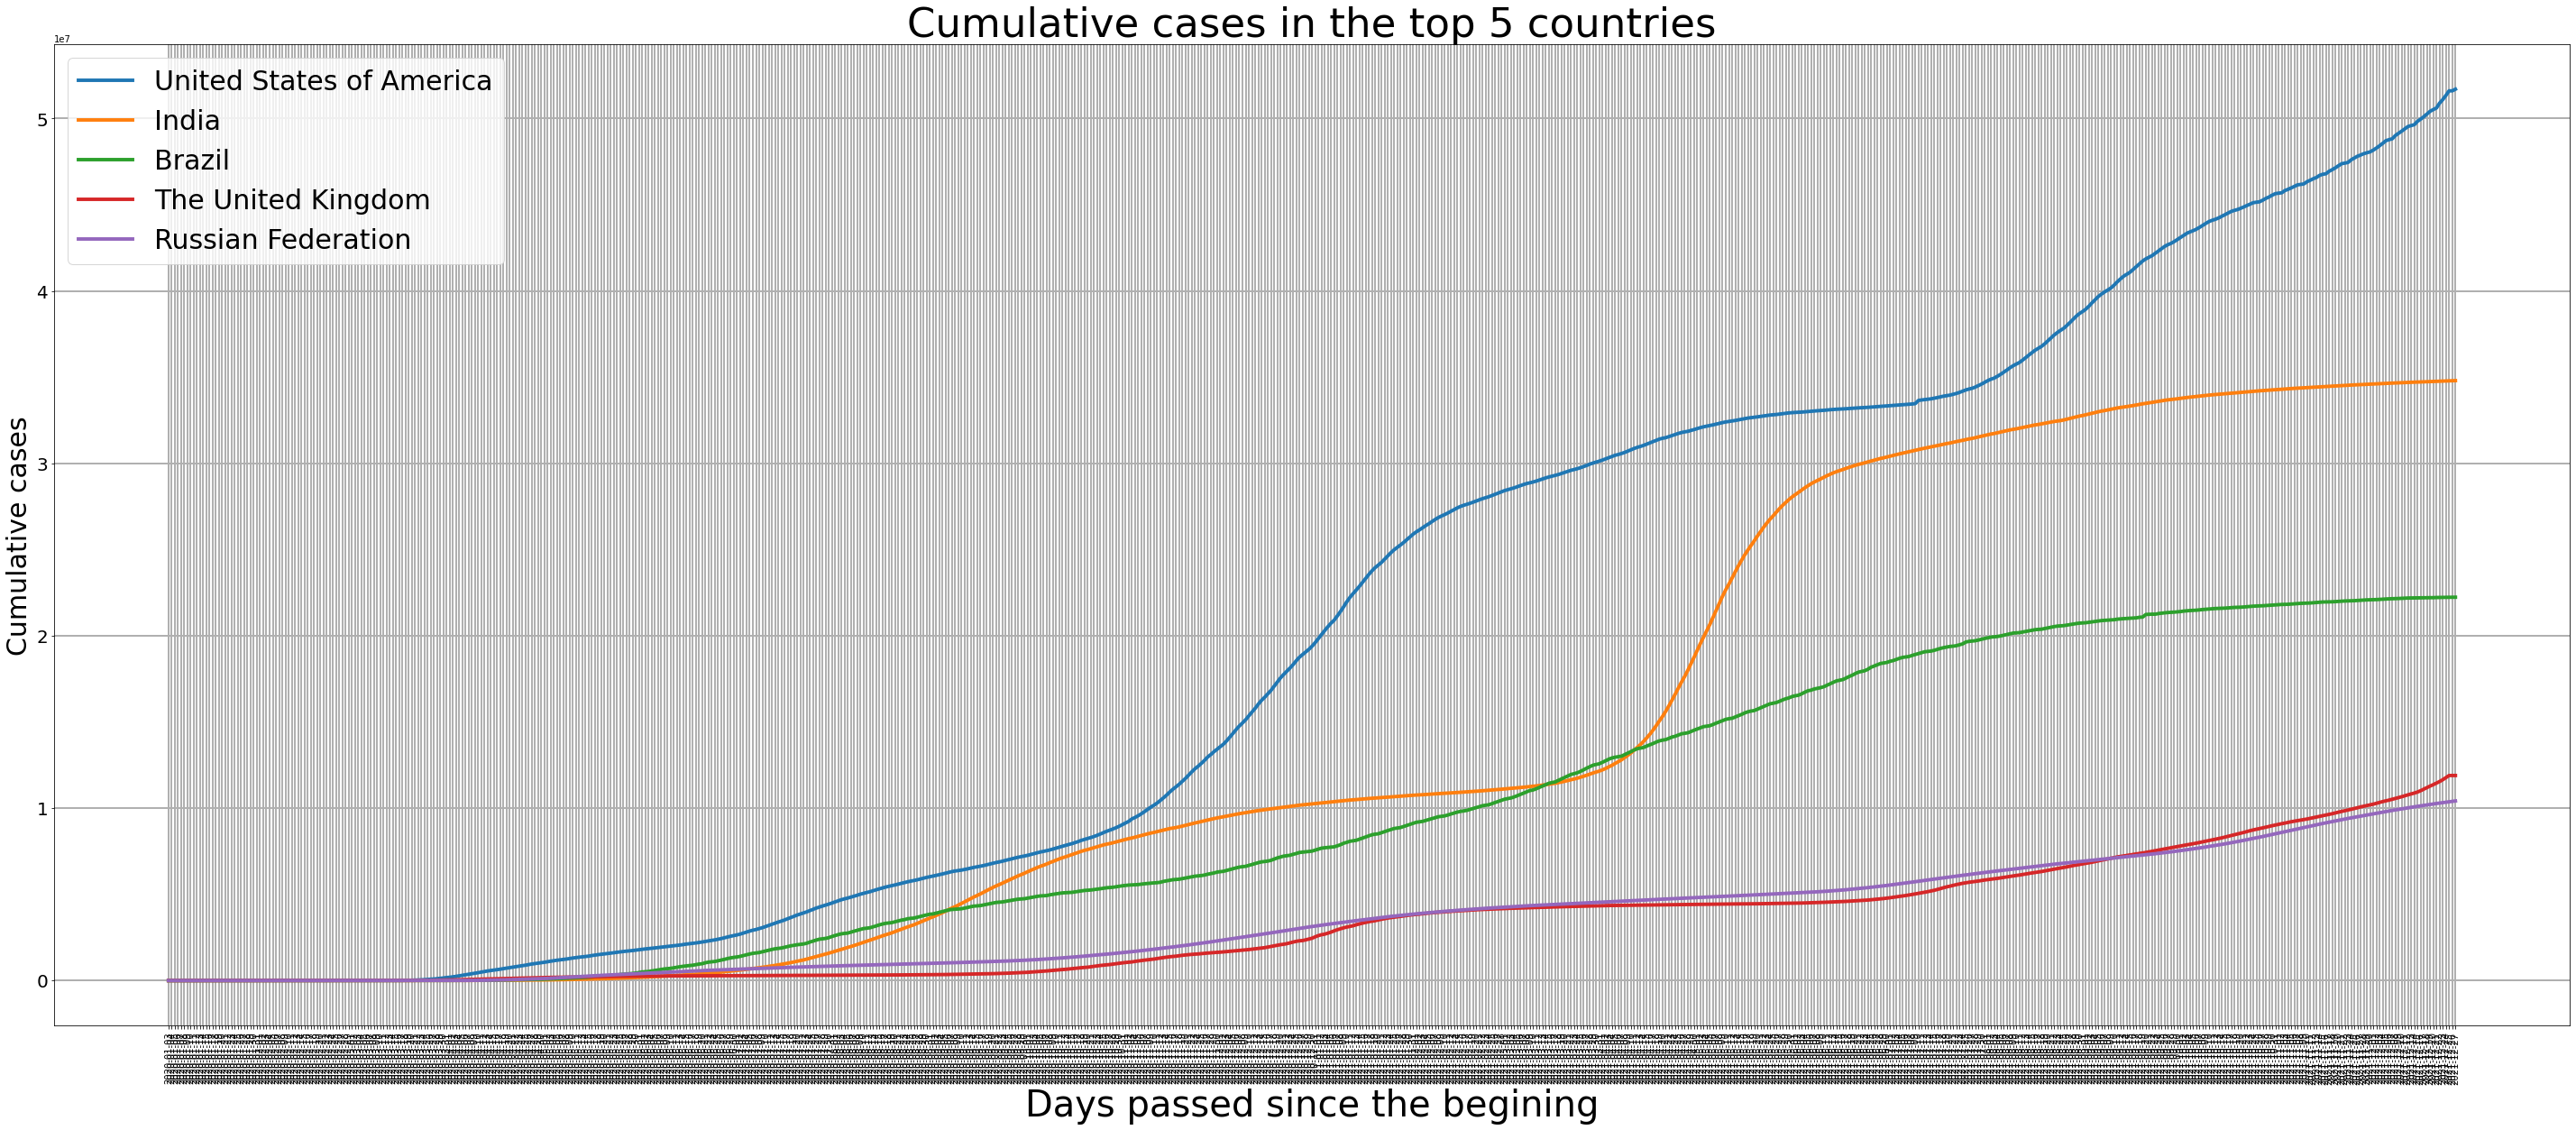

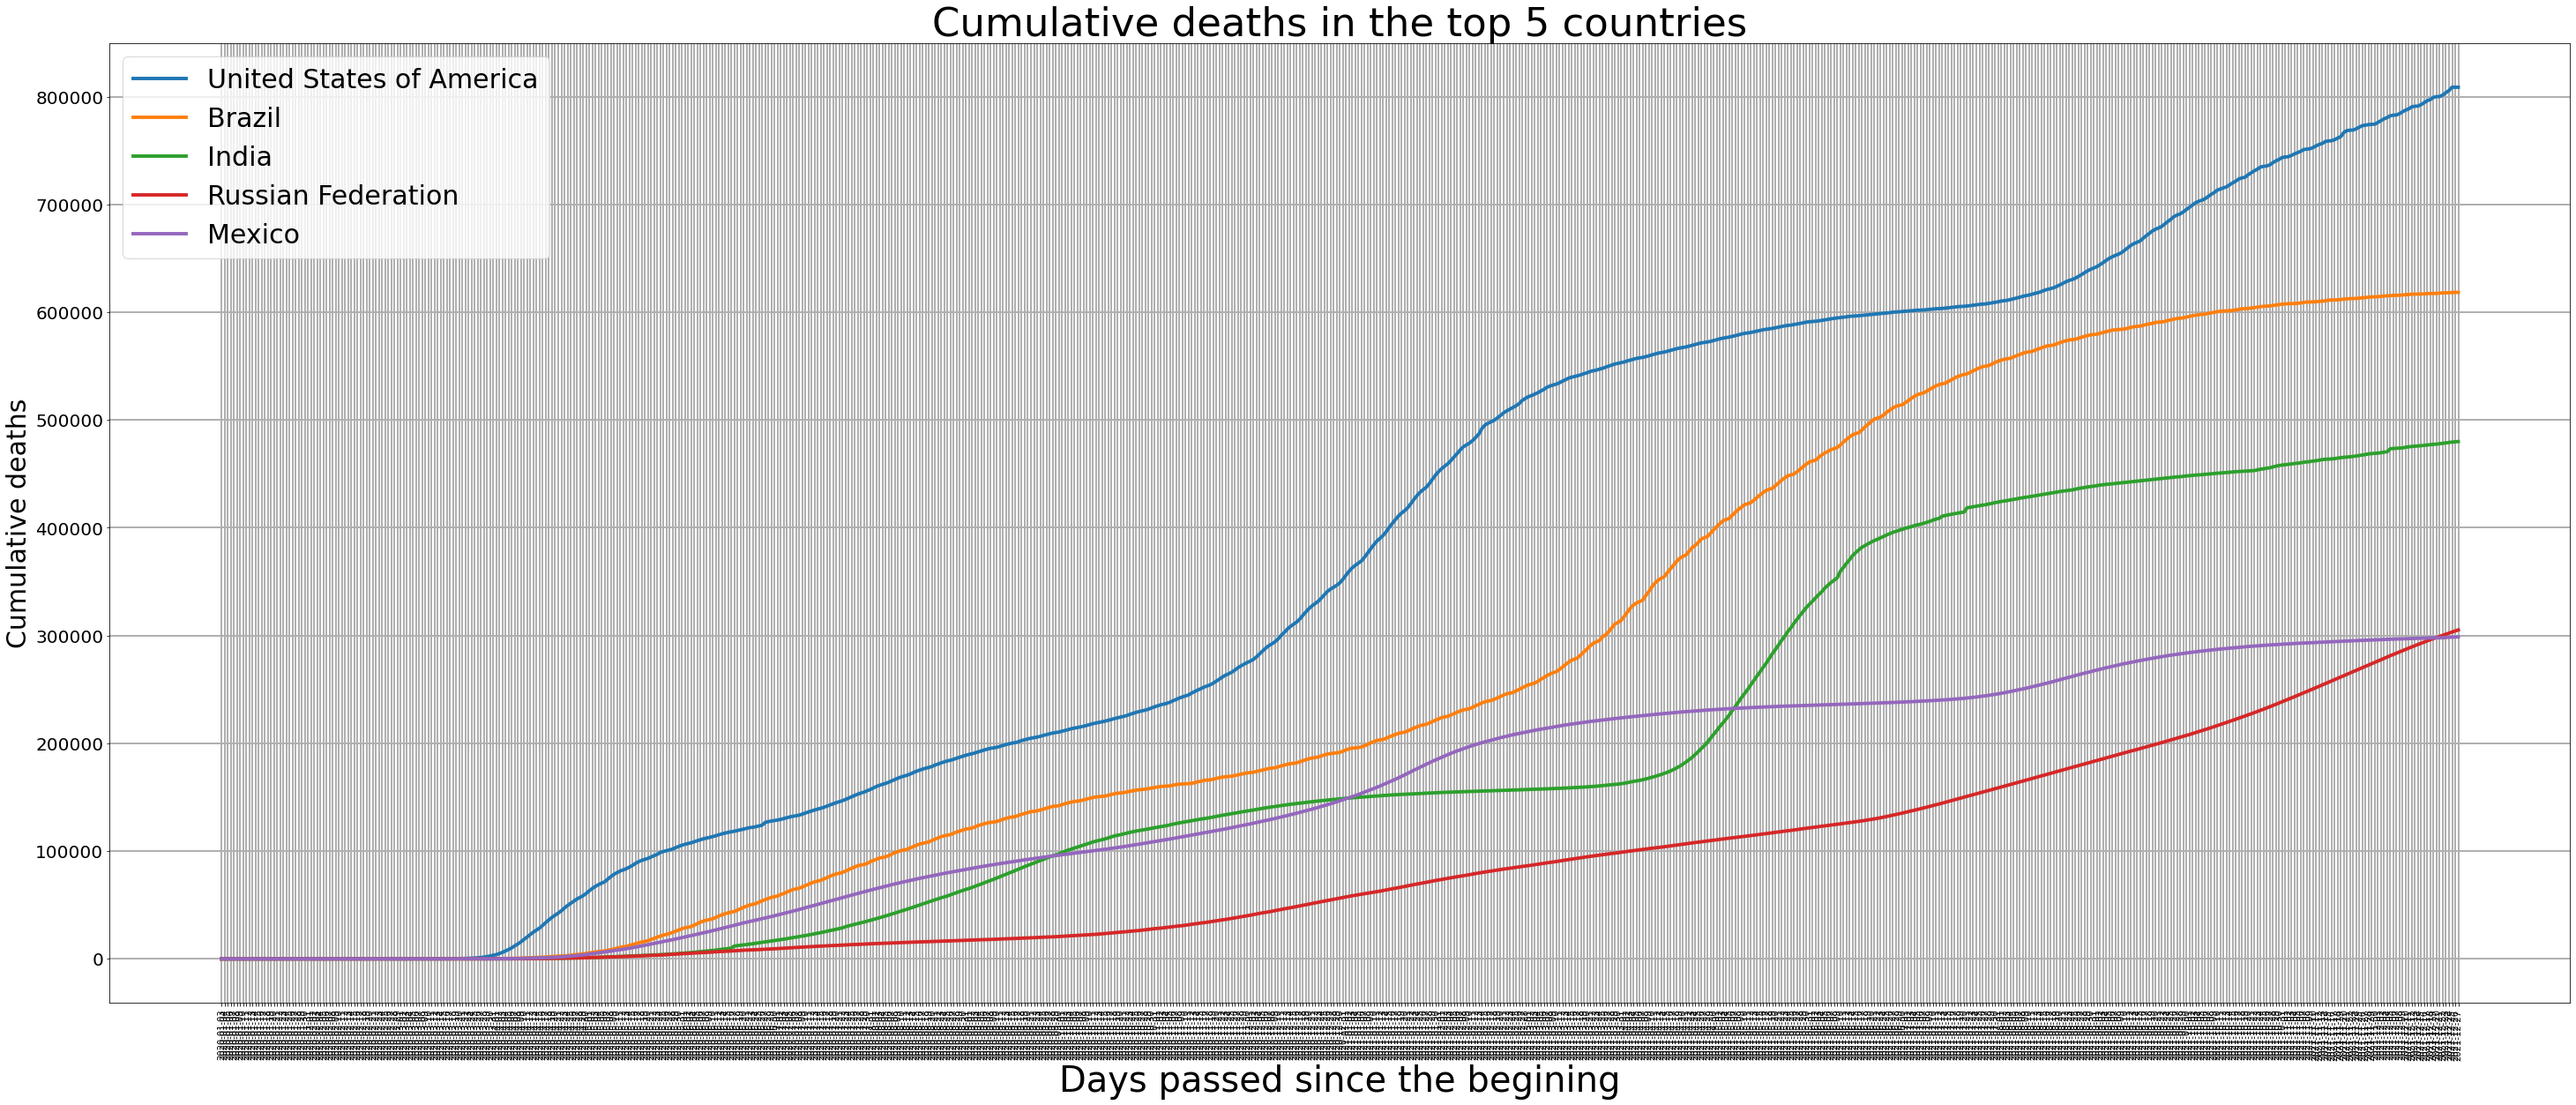

In [14]:
vf.plot_top5(countries_covid,Dates_reported,'cumulative_cases','total_cases','cases')
vf.plot_top5(countries_covid,Dates_reported,'cumulative_deaths','total_deaths','deaths')

We can plot results for all countries. (For example Belgium)

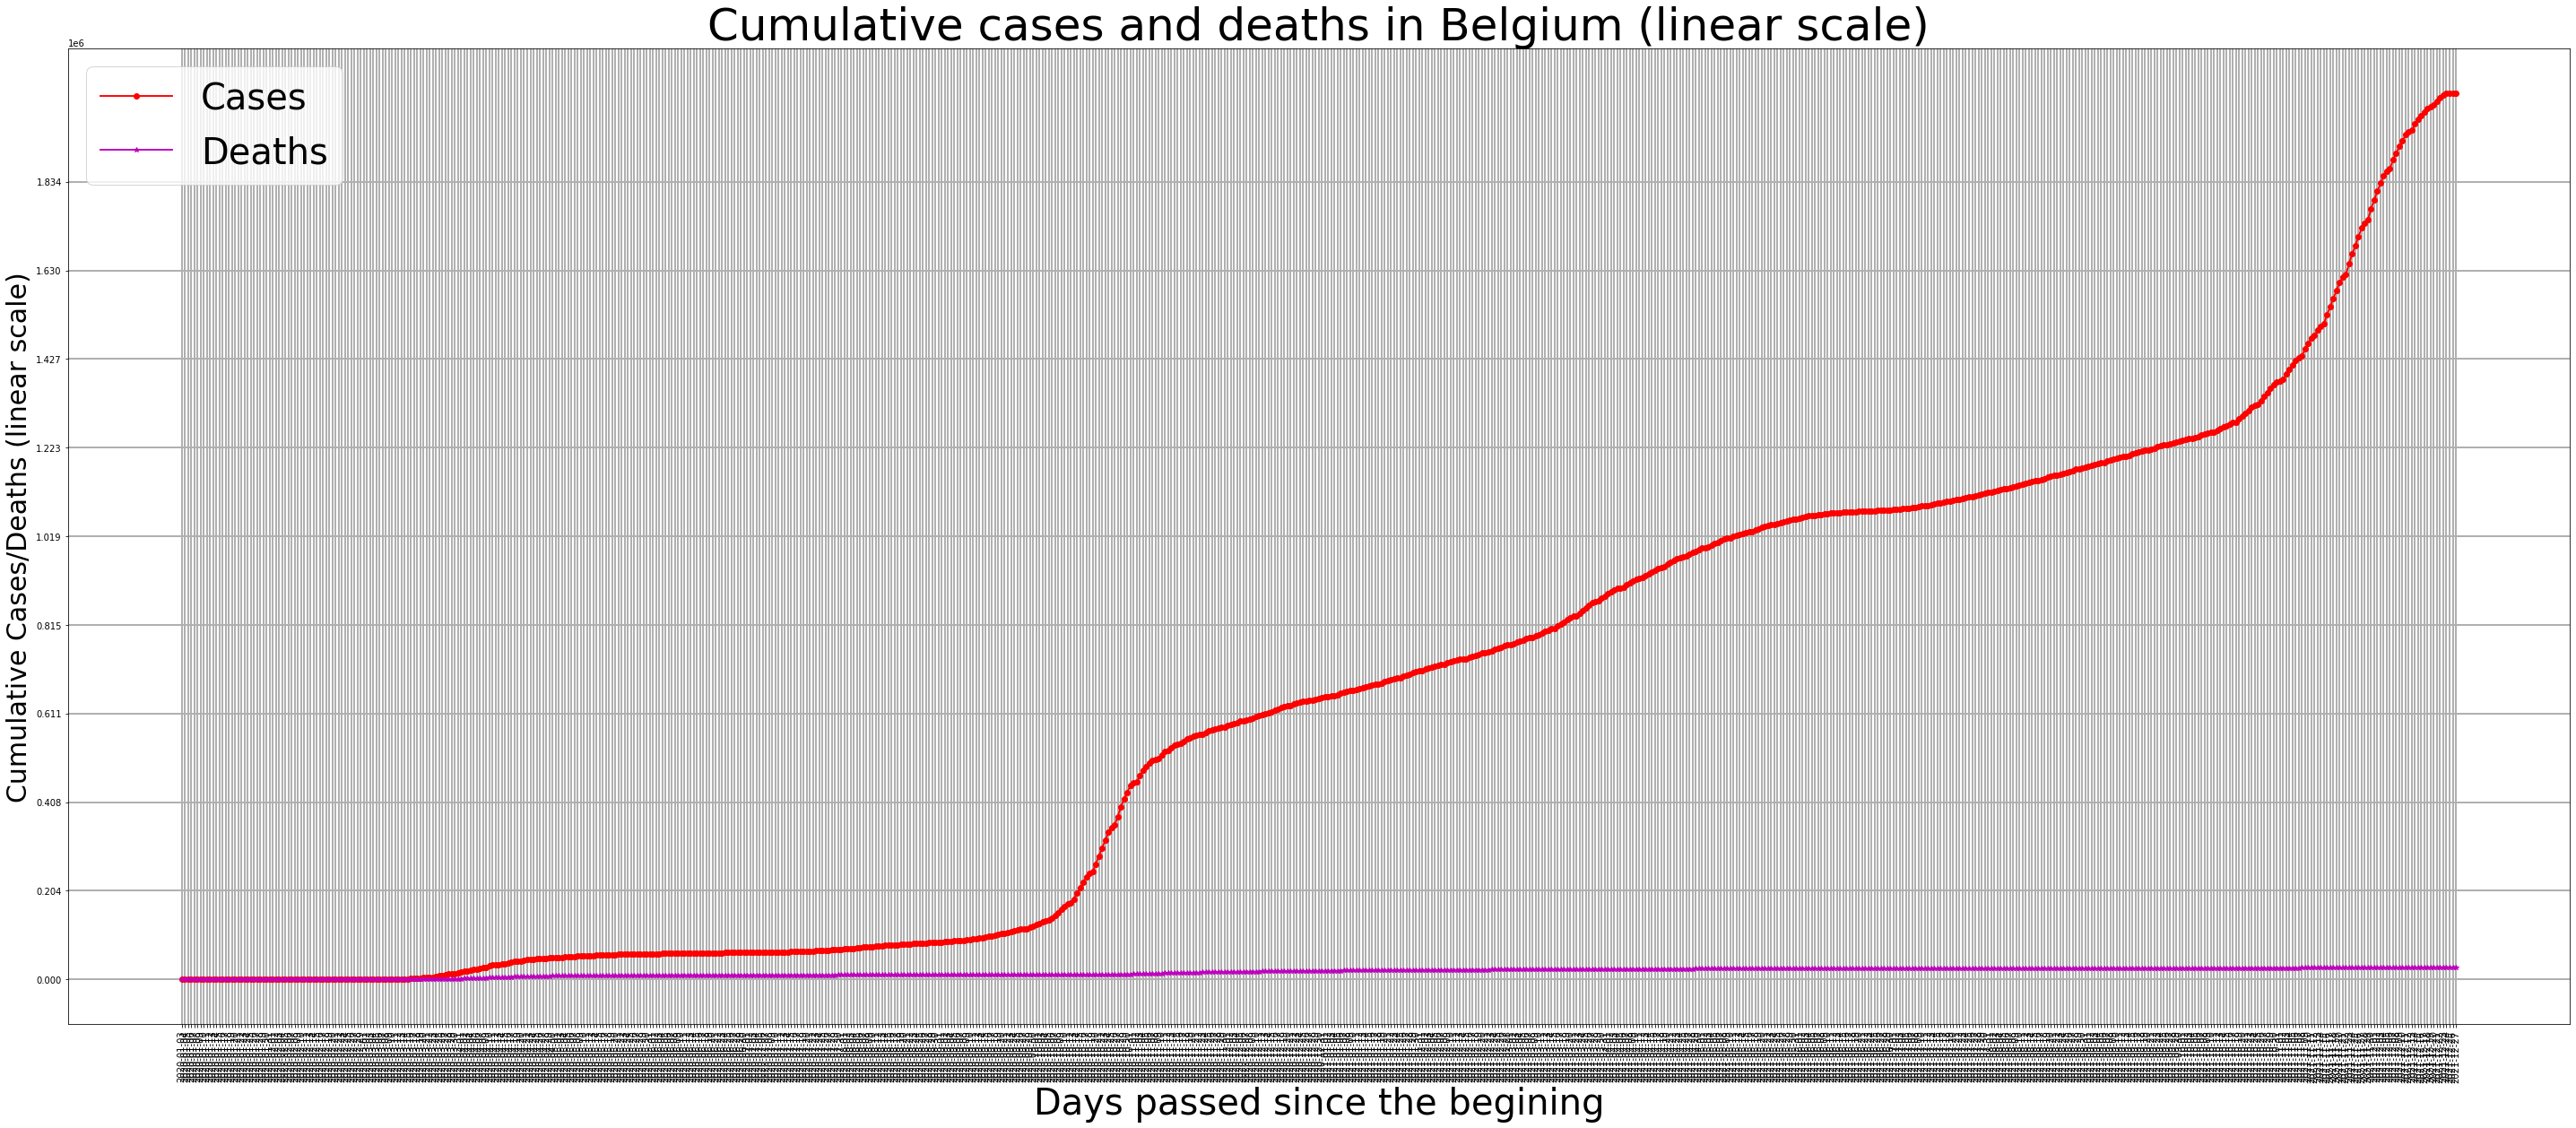

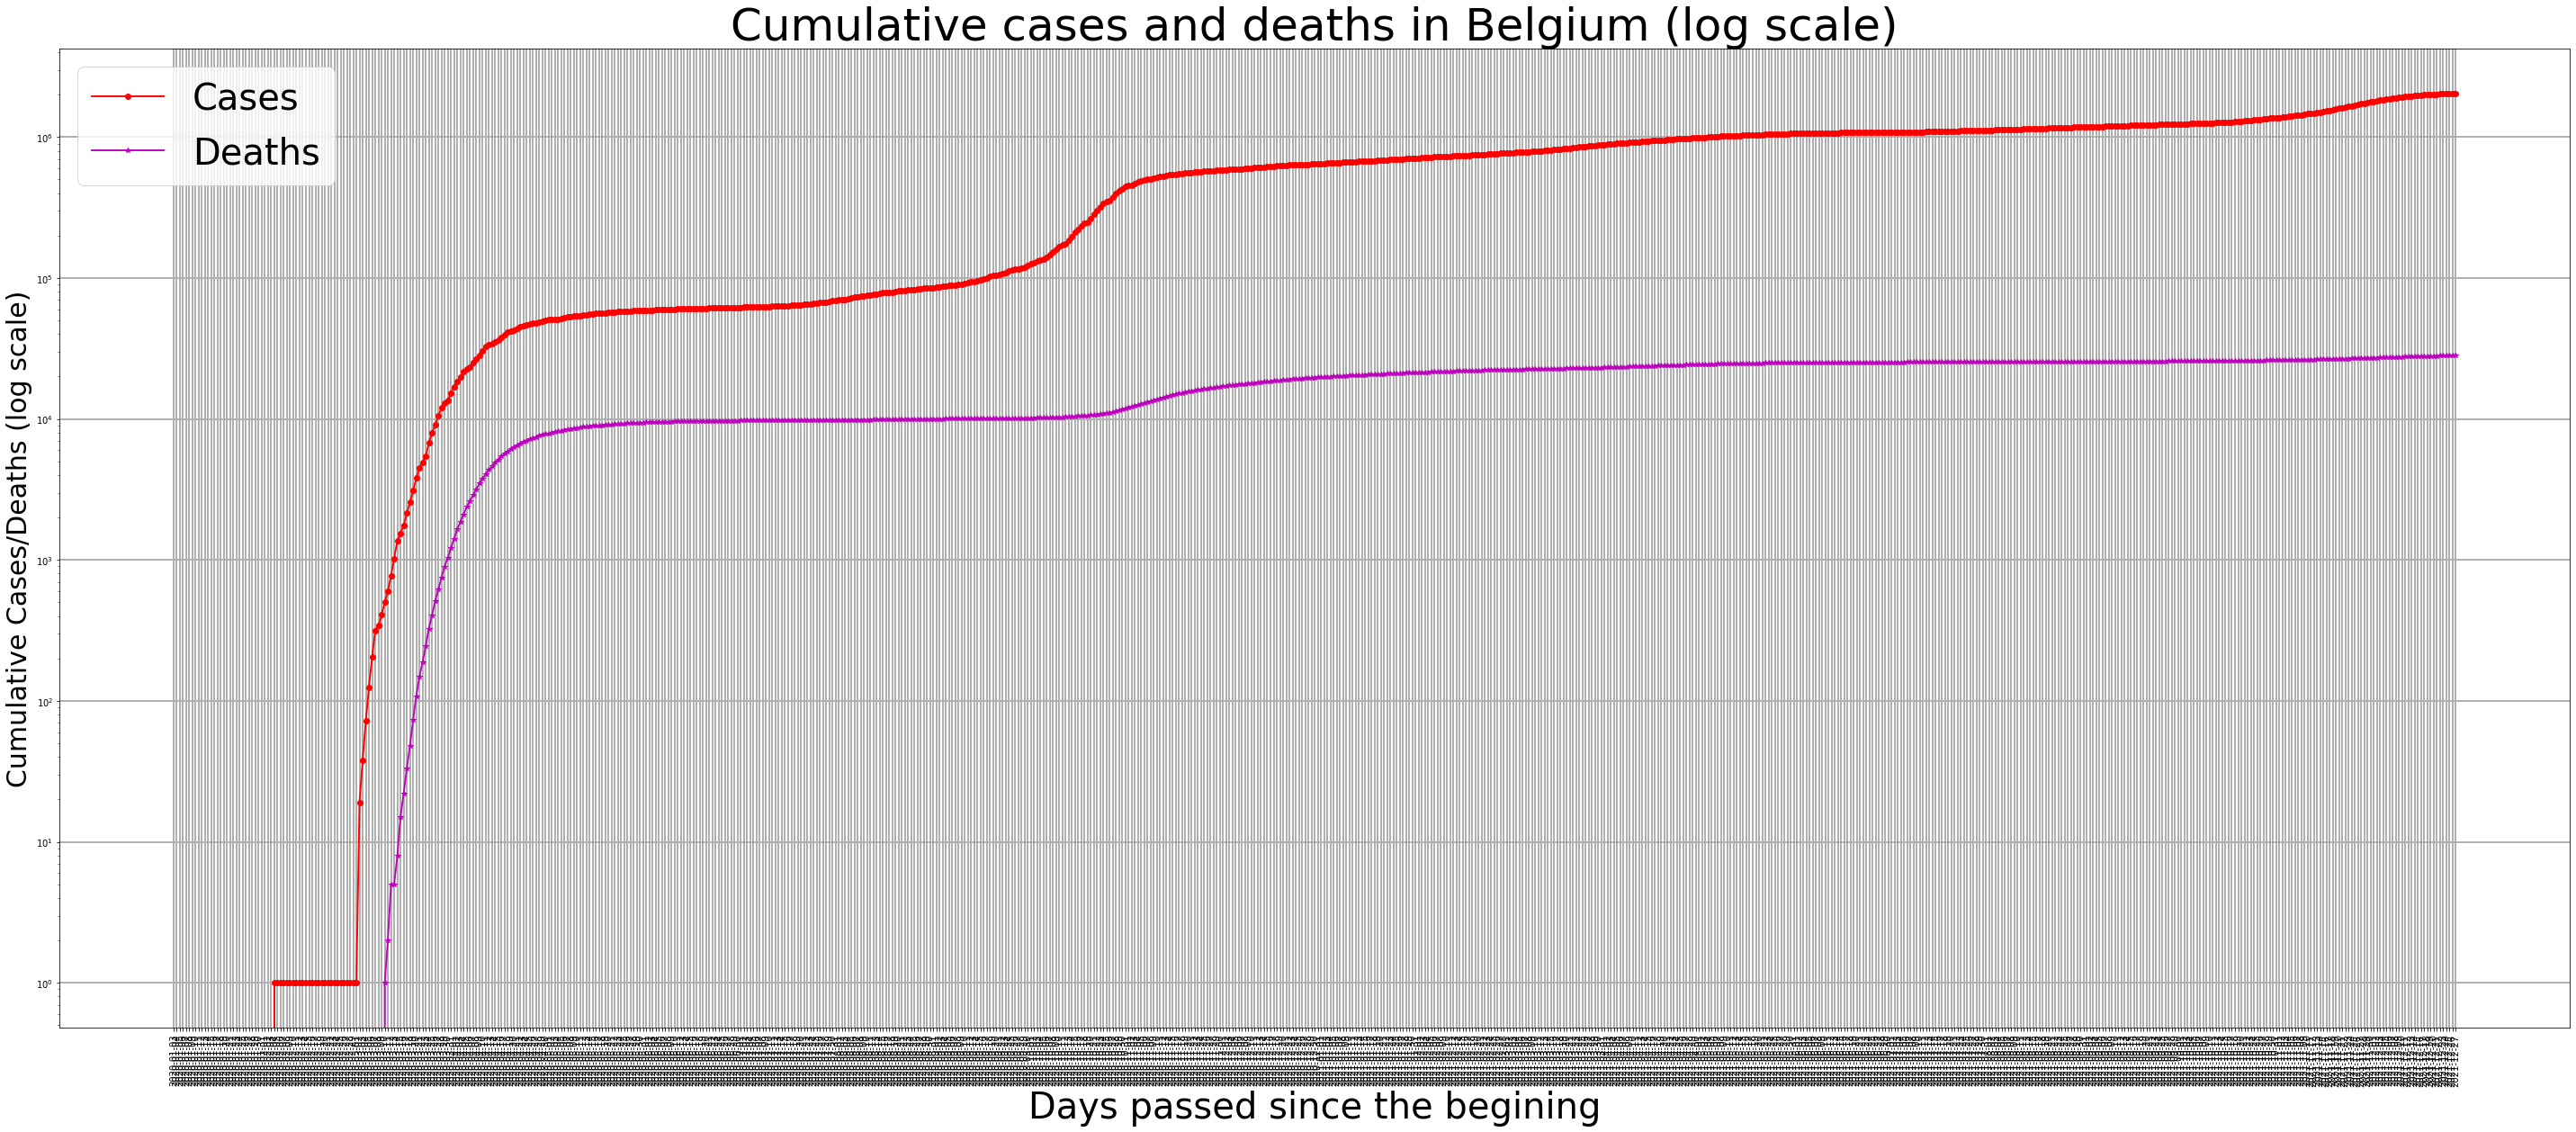

In [15]:
vf.plot_cumulative(countries_covid[19].cumulative_cases,countries_covid[19].cumulative_deaths,'in '+countries_covid[19].country_name,Dates_reported,'linear')
vf.plot_cumulative(countries_covid[19].cumulative_cases,countries_covid[19].cumulative_deaths,'in '+countries_covid[19].country_name,Dates_reported,'log')

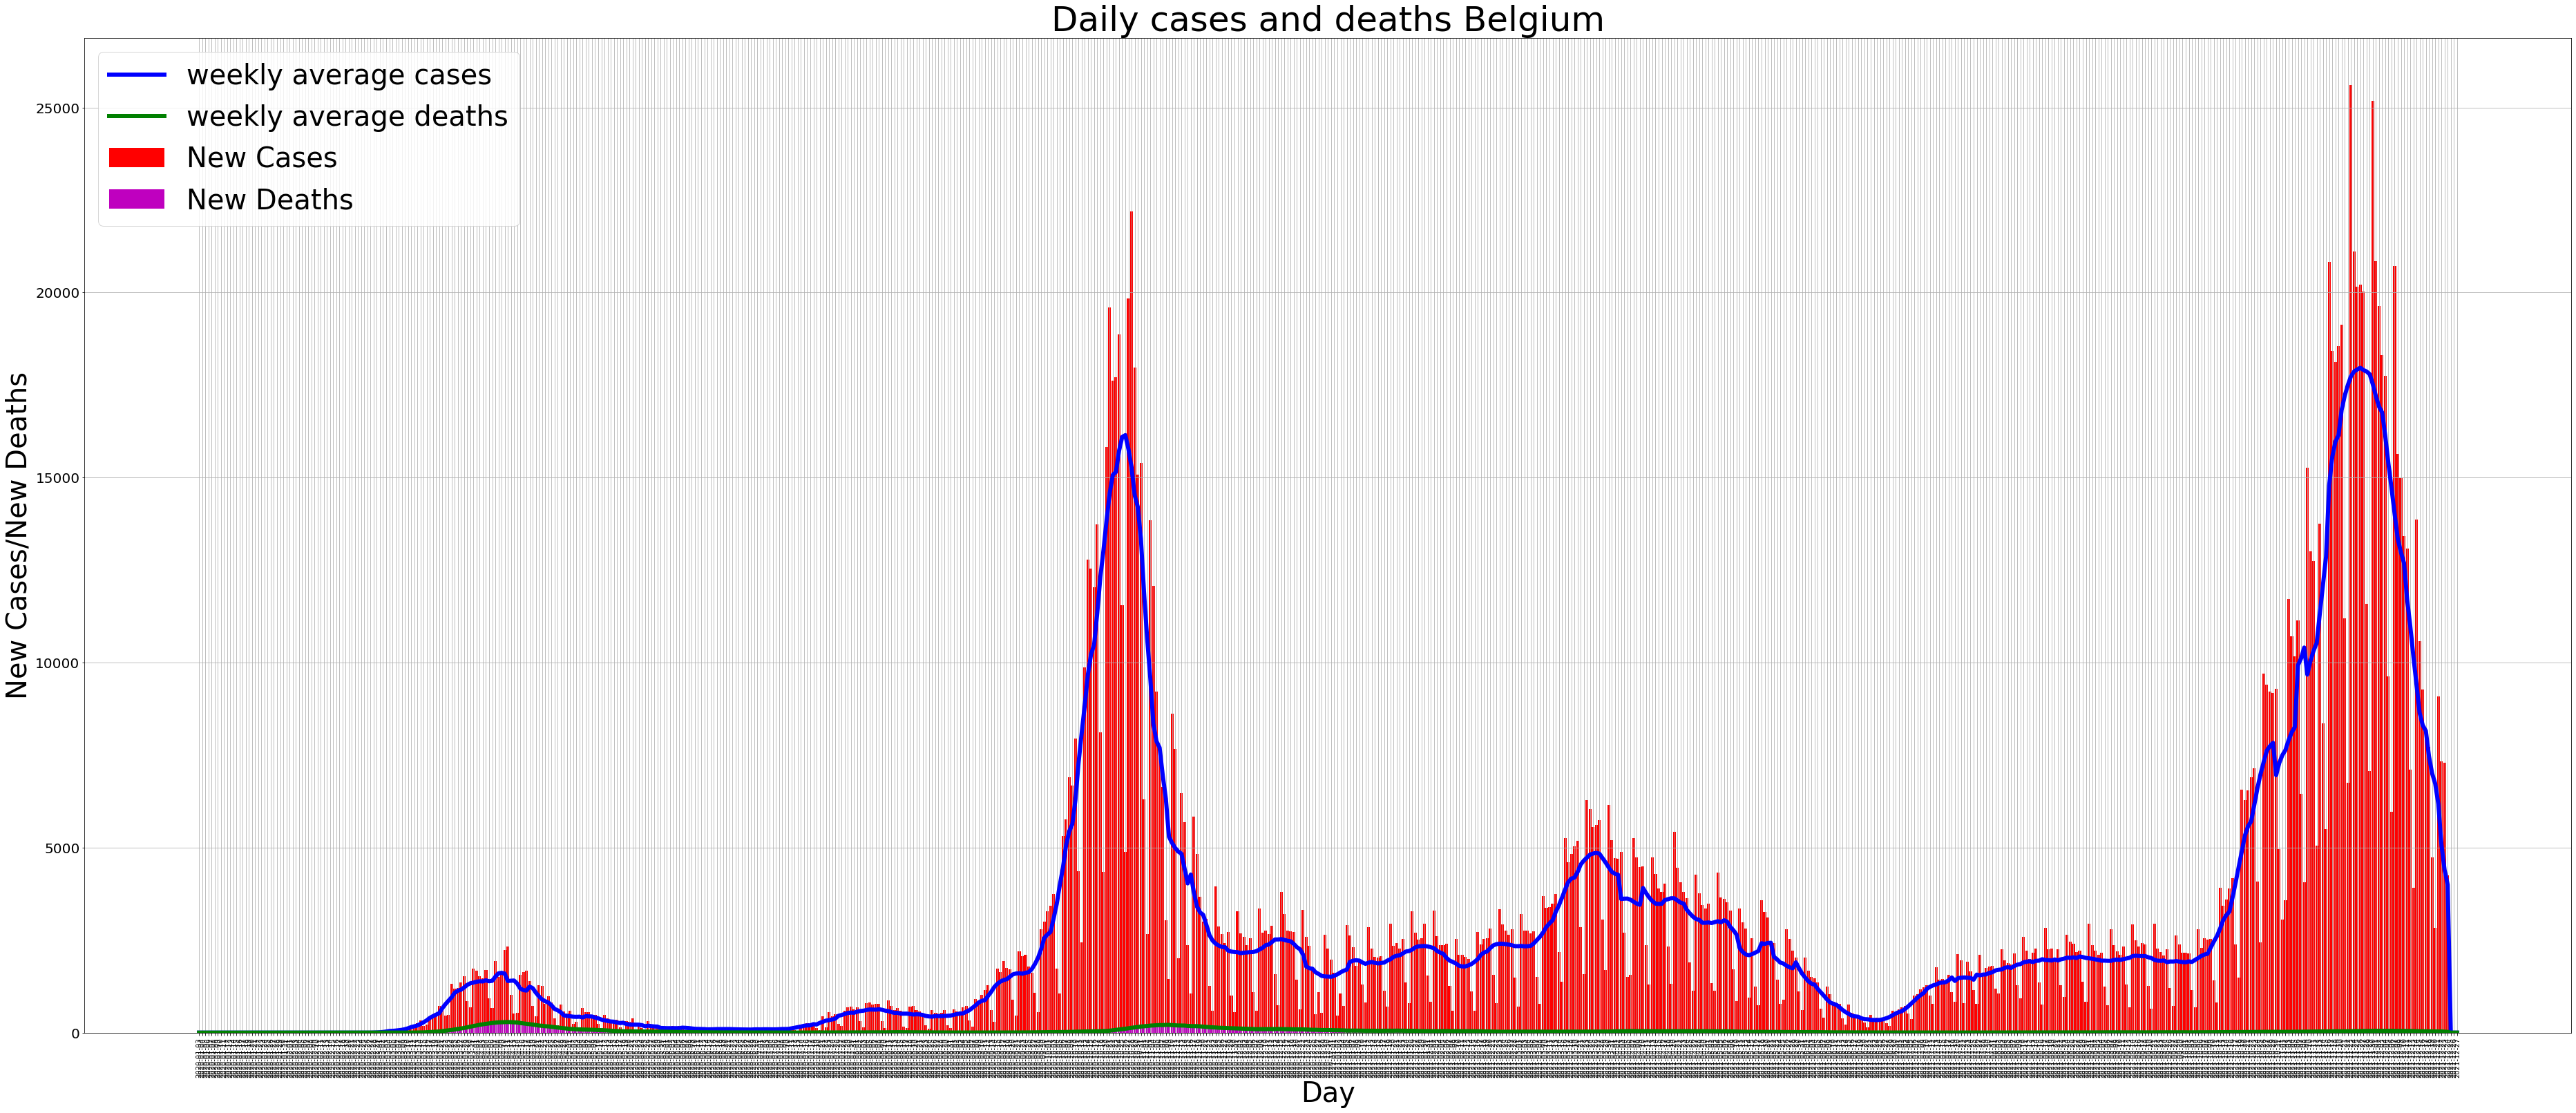

In [16]:
weekly_c=vf.moving_av(countries_covid[19].new_cases,7)
weekly_d=vf.moving_av(countries_covid[19].new_deaths,7)
vf.plot_daily(countries_covid[19].new_cases,countries_covid[19].new_deaths,weekly_c,weekly_d,Dates_reported,countries_covid[19].country_name)